In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report

import numpy as np
from scipy import stats

In [4]:
# Import Thera Bank dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights
It seems that all values are treated as continuous values. We need to define categorical values for this purpose, like Personal Loan por example. 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [86]:
df.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Insights
We don`t have null values

## Number of unique in each column

In [87]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Insights
ID column has all unique values and it not a continous column, could not provide any information.

In [7]:
new_df = df.drop('ID', axis =1 )
new_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [108]:
new_df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

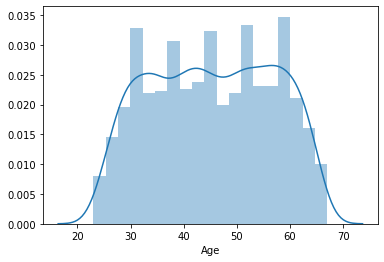

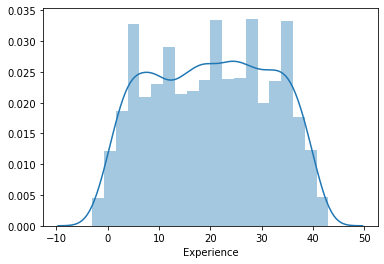

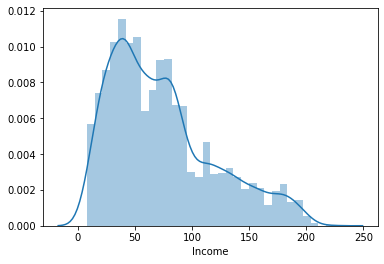

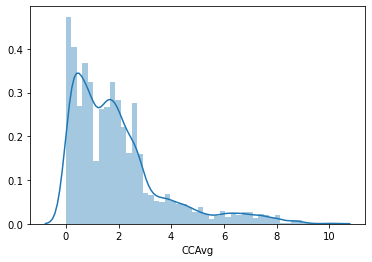

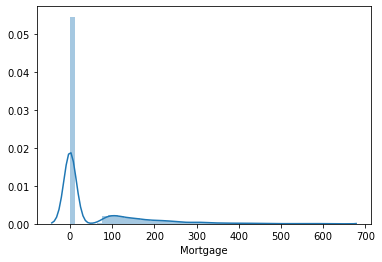

In [115]:
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(new_df[i])
    plt.show()

### Insights
The data is positively skewed for the three Variables ('Income','CCAvg','Mortgage'), but Mortgage show that a lot of values are concentrate around 0.  

## Number of people with zero mortgage

In [134]:
new_df['Mortgage'].value_counts(normalize=True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [138]:
new_df.groupby(new_df['Mortgage']== 0)['Mortgage'].count()

Mortgage
False    1538
True     3462
Name: Mortgage, dtype: int64

### Insights
69% or 3462 people have zero Mortgage, that mean is highly skewed and we delete this column as we have already seen in other exercises.

In [8]:
df_2 = new_df.drop('Mortgage', axis =1 )

## Number of people with zero credit card spending per month

In [142]:
new_df.groupby(new_df['CCAvg']== 0)['CCAvg'].count()

CCAvg
False    4894
True      106
Name: CCAvg, dtype: int64

### Insights
106 people have zero CCAvg.

In [31]:
# Just to check if the Statement was true
plc = df_2['Personal Loan'].value_counts(normalize=True)
print(plc *100)

0    90.4
1     9.6
Name: Personal Loan, dtype: float64


In [32]:
df_2['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

### Insights
The 9.6 percentage of the people accepted a personal loan, just like the Statement already says.  

## Value counts of all categorical columns

In [143]:
#Loop into the columns to get the value_counts for each one.
for i in list(df_2.columns):
    print(df_2[i].value_counts(normalize=True))

35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64
 32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0.0284
 28    0.0276
 18    0.0274
 19    0.0270
 26    0.0268
 24    0.0262
 3     0.0258
 14    0.0254
 16    0.0254
 30    0.0252
 34    0.0250
 27    0.0250
 17    0.0250
 29    0.0248
 22    0.0248
 7     0.0242
 8     0.0238
 6     0.0238
 15    0.0238
 10    0.0236
 33    0.0234
 13    0.02

## Bivariate Analysis

In [145]:
df_2.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,0.125000,0.291667,0.606250,0.297917


In [146]:
df_2.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,1.0,0.0


### Insights
People who have a personal loan are the same avg age as those who do not. We can see the biggest difference in income and CCAvg. People Who have a personal loan have more income per year. They also spend more money per month on credit cards.

In [147]:
pd.crosstab(df_2['Age'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Age,,
23,1.000000,0.000000
24,1.000000,0.000000
25,1.000000,0.000000
26,0.833333,0.166667
27,0.868132,0.131868
28,0.912621,0.087379
29,0.878049,0.121951
30,0.875000,0.125000
31,0.944000,0.056000


### Insight
People who have 23, 24, 25, 66, 67 bouth extrems are not taken loan. There is no clear trend to those who do have.

In [148]:
pd.crosstab(df_2['Experience'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Experience,,
-3,1.000000,0.000000
-2,1.000000,0.000000
-1,1.000000,0.000000
0,0.893939,0.106061
1,0.891892,0.108108
2,0.894118,0.105882
3,0.868217,0.131783
4,0.920354,0.079646
5,0.904110,0.095890


### Insight
here is no clear trend.

In [149]:
pd.crosstab(df_2['Family'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


### Insight
Families with 3 or more members are taking more loan.

In [150]:
pd.crosstab(df_2['Education'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


### Insight
People graduate or Advances/Professional are taking more loan

In [157]:
pd.crosstab(df_2['Securities Account'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


### Insight
People who have Securities account have a little more loan

In [158]:
pd.crosstab(df_2['CD Account'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


### Insight
People who have CD Account are taking less loan

In [160]:
pd.crosstab(df_2['Online'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


### Insight
People who use Online banking have no more loan

In [154]:
pd.crosstab(df_2['CreditCard'],df_2['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


### Insight
People with credit cards have no more loans

# Model using Logistic Regression

In [9]:
#We create a new df 
X = df_2.drop('Personal Loan', axis=1) # We drop the variable target to predict from the df

In [10]:
Y = df_2['Personal Loan'].astype('category')   

In [11]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,1,0,0,0
1,45,19,34,90089,3,1.5,1,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,1


In [12]:
# Converting every possible categorical columns
X['Family'] = X['Family'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Securities Account'] = X['Securities Account'].astype('category')
X['CD Account'] = X['CD Account'].astype('category')
X['Online'] = X['Online'].astype('category')
X['CreditCard'] = X['CreditCard'].astype('category')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 225.4 KB


In [14]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [15]:
X.head()

,Age,Experience,Income,ZIP Code,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,91107,1.6,0,0,1,0,0,1,0,0,0
1,45,19,34,90089,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,2.7,0,0,0,1,0,0,0,0,0
4,35,8,45,91330,1.0,0,0,1,1,0,0,0,0,1


In [16]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
#TODO: Ask about random_state. I will take the same value to the exercice.

In [22]:
logreg = LogisticRegression(random_state=7) 

In [23]:
logreg.fit(X_train, y_train)   

LogisticRegression(random_state=7)

In [24]:
#Predict the target variable (Personal Loan) on test data
y_predict = logreg.predict(X_test)

In [25]:
# We create a new df to add the new variables Observer and Predicted
z = X_test.copy()
z['Observer Personal loan'] = y_test
z['Predicted Personal loan'] = y_predict
z.head()

,Age,Experience,Income,ZIP Code,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observer Personal loan,Predicted Personal loan
3406,42,12,34,92177,2.0,0,1,0,0,1,0,0,0,1,0,0
757,52,28,81,91745,1.8,0,1,0,1,0,1,0,0,0,0,0
3624,58,28,70,92028,1.4,0,0,0,0,1,0,0,0,0,0,0
4544,28,4,80,95819,2.5,0,1,0,0,0,0,0,1,0,0,0
3235,60,35,39,91711,1.6,1,0,0,0,1,0,0,1,0,0,0


[[1334   28]
 [  97   41]]


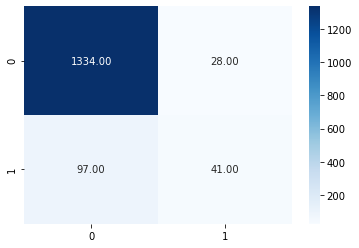

In [26]:
#Confusion matrix and his heatmap to see the performance of the model
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues')
print(cf_matrix)

In [33]:
y_test.value_counts()

0    1362
1     138
Name: Personal Loan, dtype: int64

In [36]:
plc = y_test.value_counts(normalize=True)
print(plc *100)

0    90.8
1     9.2
Name: Personal Loan, dtype: float64


### Insight
Our model is predicted almost the same values as a the last campain with the 30% split as a data test.

In [197]:
#Accurancy
atrain = logreg.score(X_train, y_train)
print('Training accurancy:', atrain)
atest = logreg.score(X_test, y_test)
print('Testing accurancy:', atest)

# Recall
recall = recall_score(y_test,y_predict)
print('Recall:', recall)

#Precision
precision = precision_score(y_test,y_predict)
print("Precision:", precision)

#F1 Score
f1 = f1_score(y_test,y_predict)
print("F1 Score:", f1)

#ROC/AUC
ra = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",ra)

Training accurancy: 0.9028571428571428
Testing accurancy: 0.9166666666666666
Recall: 0.2971014492753623
Precision: 0.5942028985507246
F1 Score: 0.3961352657004831
Roc Auc Score: 0.6382717231692523


In [29]:
# From https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1362
           1       0.59      0.30      0.40       138

    accuracy                           0.92      1500
   macro avg       0.76      0.64      0.68      1500
weighted avg       0.90      0.92      0.90      1500



# Business Insight

The observed values 1334 are 0 (not taken Personal loan) and the model predicted them as 0 
The observed values 97 are 0 (not taken Personal loan) and the model predicted them as taken Personal loan.

The observed values 41 are 1 (taken Personal loan) and the model predicted them as 1 
The observed values 28 are 1 (taken Personal loan) and the model predicted them as not taken Personal loan.

125 observed values aren't correctly predicted

The accurancy from the model for testing data is 0.91. That means our model is doing a great job to identify people with less risk for a Personal loan.

The precision of the model is 0.59. That means it predicts that people is taking a Personal loan it is correct 59% of the time. 

The recall of the model is 0.29. That means there is a lot of false negative and we need to decrease this number. 

The F1 Score is 0.39. That means less precision and recal for our model. 

We have a good model to predict because is close to the observed values, but if we can increase the number of people who is takinf Personal loan we need to improve precision and recall. We can modify the EDA and see wich values are really necesary or why marketing departament are considered them.

We see in the Bivariate Analysis that Income, CCAvg and CD Account have the biggest differences. Maybe the number of family can be a good variable to considered for. 

Marketing should focus in people who has more Income per Month/sprend more Money in credit cards, and have CD account, and family wiht 3 or more menbers to increase the number of people with Personal loan.  